In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
import numpy as np

# Обработка данных



## Считываем данные

In [ ]:
df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
df.shape

(36671, 15)

In [ ]:
df.head()

,name,_id,host_name,location_cluster,location,lat,lon,type_house,sum,min_days,amt_reviews,last_dt,avg_reviews,total_host,target
0,Belle Harbor 4 BR 2 bath- 1 bl from Beach,40327248,Sarina,Queens,Neponsit,40.57215,-73.85822,Entire home/apt,350,2,5,2019-07-07,2.88,1,334
1,"Come see Brooklyn, New York",13617520,Howard T.,Brooklyn,Clinton Hill,40.69172,-73.96934,Shared room,40,5,8,2015-02-25,0.13,1,0
2,Large 2Br on W71st & Columbus Feb 19-28,26754726,Julie,Manhattan,Upper West Side,40.77673,-73.98011,Entire home/apt,200,5,0,NaN,NaN,1,0
3,Perfect bedroom. Near Subways Columbia CityCol...,16721721,Federico,Manhattan,Harlem,40.81530,-73.95080,Private room,65,2,18,2018-11-04,0.64,1,0
4,Cozy Sun Filled Fresh Guest Room in Artsy Bush...,22246463,Lisa,Brooklyn,Bushwick,40.70230,-73.92935,Private room,99,2,26,2019-06-23,0.76,1,155


### Попробуем проанализировать признаки

### Посмотрим на уникальность признака name

In [ ]:
df['name'].value_counts()

,count
name,
New york Multi-unit building,14
Hillside Hotel,14
Private Room,11
Brooklyn Apartment,10
Home away from home,10
...,...
Queen size room in Brooklyn,1
Beautiful Large Room in Uptown Manhattan,1
Gorgeous 1bd in Trendy Brooklyn!,1


### Видим, что максимально одно имя повторяется 14 раз => данный признак не особо информативен для нас

### Посмотри на host_name и уникальность значений

In [ ]:
df['host_name'].value_counts()

,count
host_name,
Michael,308
David,306
Sonder (NYC),238
John,223
Alex,205
...,...
Jeana Paola,1
Teddie,1
Anne-Sophie,1


### Видим, что довольно часто может встречаться одно имя => этот признак полезен для обучения нашей модели

In [ ]:
import matplotlib as mpl
mpl.rcParams.update({
    "axes.facecolor": "#101010",  # Цвет фона осей
    "figure.facecolor": "#101010",  # Цвет фона всей фигуры
    "axes.grid": True,
    "grid.color": "white",
    "grid.linestyle": "--",
    "grid.linewidth": 0.5,
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "text.color": "white",
})

### Посмотрим на кластеры и их количесвто

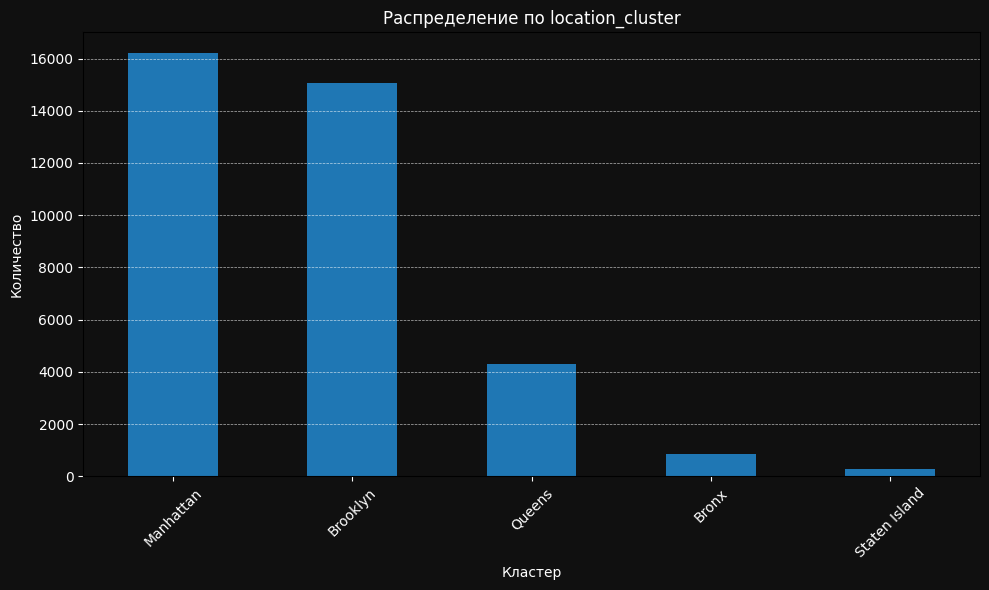

In [ ]:
counts = df['location_cluster'].value_counts()

plt.figure(figsize=(10, 6))
counts.plot(kind='bar')
plt.title('Распределение по location_cluster')
plt.xlabel('Кластер')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis="x", linestyle="", alpha=0.7)
plt.tight_layout()
plt.show()

### Всего у нас есть 5 класстеров, что может быть полезно при заполнении пропусков
### Чаще всего встречается кластер Manhattan и Brooklyn

### Посмотрим на признак локация

In [ ]:
df['location'].value_counts()

,count
location,
Williamsburg,2964
Bedford-Stuyvesant,2755
Harlem,2002
Bushwick,1865
Upper West Side,1498
...,...
Woodrow,1
Willowbrook,1
New Dorp,1


### Видим, что очень много локаций повторяются, что так же можно использовать при обучении модели и заполнении пропусков

### Посмотрим на тип дома

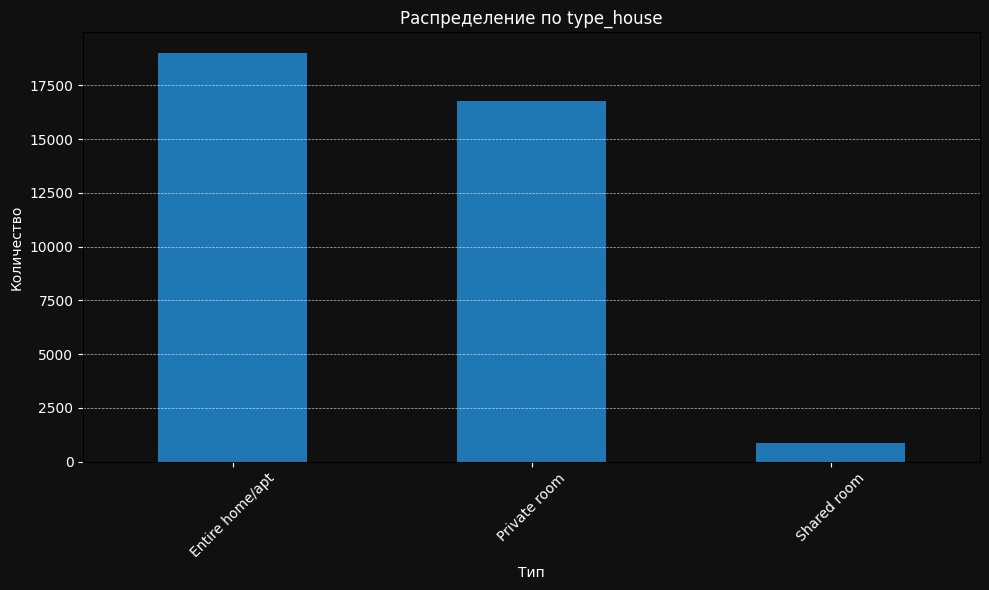

In [ ]:
counts = df['type_house'].value_counts()

plt.figure(figsize=(10, 6))
counts.plot(kind='bar')
plt.title('Распределение по type_house')
plt.xlabel('Тип')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis="x", linestyle="", alpha=0.7)
plt.tight_layout()
plt.show()

### Всего есть три типа дома - shared room, private room, entire home/apt

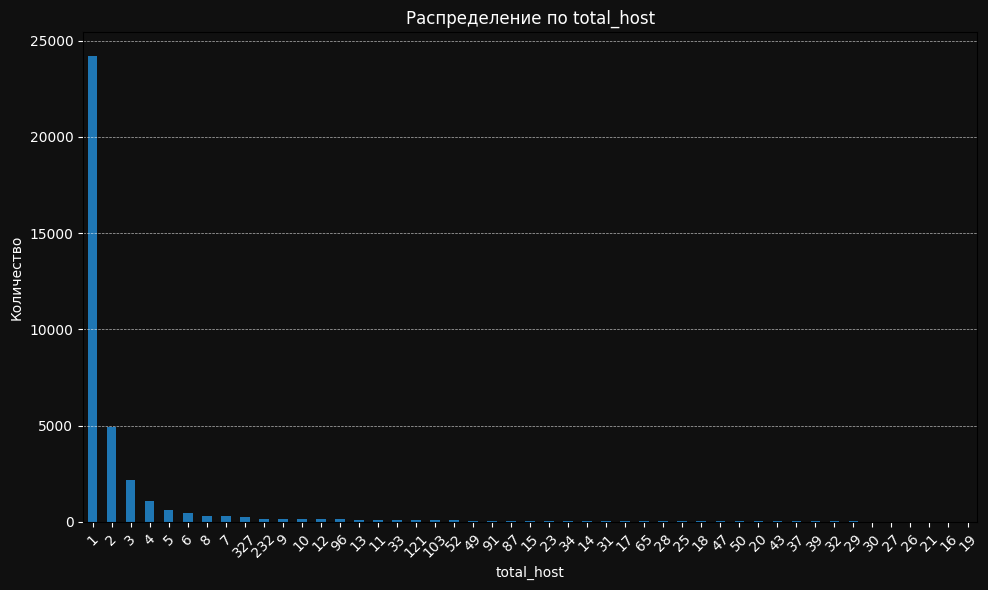

In [ ]:
counts = df['total_host'].value_counts()

plt.figure(figsize=(10, 6))
counts.plot(kind='bar')
plt.title('Распределение по total_host')
plt.xlabel('total_host')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis="x", linestyle="", alpha=0.7)
plt.tight_layout()
plt.show()

### Чаще всего встречается от 1 до 4

### Посмотрим на пропуски

In [ ]:
df.isna().sum()

,0
name,9
_id,0
host_name,18
location_cluster,0
location,0
lat,0
lon,0
type_house,0
sum,0
min_days,0


## Пропуски есть в признаках last_dt и avg_reviews

### Заполним пропуски признака last_dt, сначала разобьем этот признак еще на несколько - год, месяц, час, день недели

In [ ]:
df['last_dt'] = pd.to_datetime(df['last_dt'])

df['year'] = df['last_dt'].dt.year
df['month'] = df['last_dt'].dt.month
df['hour'] = df['last_dt'].dt.hour
df['day_of_week'] = df['last_dt'].dt.weekday

In [ ]:
test_df['last_dt'] = pd.to_datetime(test_df['last_dt'])

test_df['year'] = test_df['last_dt'].dt.year
test_df['month'] = test_df['last_dt'].dt.month
test_df['hour'] = test_df['last_dt'].dt.hour
test_df['day_of_week'] = test_df['last_dt'].dt.weekday

In [ ]:
df.head()

,name,_id,host_name,location_cluster,location,lat,lon,type_house,sum,min_days,amt_reviews,last_dt,avg_reviews,total_host,target,year,month,hour,day_of_week
0,Belle Harbor 4 BR 2 bath- 1 bl from Beach,40327248,Sarina,Queens,Neponsit,40.57215,-73.85822,Entire home/apt,350,2,5,2019-07-07,2.88,1,334,2019.0,7.0,0.0,6.0
1,"Come see Brooklyn, New York",13617520,Howard T.,Brooklyn,Clinton Hill,40.69172,-73.96934,Shared room,40,5,8,2015-02-25,0.13,1,0,2015.0,2.0,0.0,2.0
2,Large 2Br on W71st & Columbus Feb 19-28,26754726,Julie,Manhattan,Upper West Side,40.77673,-73.98011,Entire home/apt,200,5,0,NaT,NaN,1,0,NaN,NaN,NaN,NaN
3,Perfect bedroom. Near Subways Columbia CityCol...,16721721,Federico,Manhattan,Harlem,40.81530,-73.95080,Private room,65,2,18,2018-11-04,0.64,1,0,2018.0,11.0,0.0,6.0
4,Cozy Sun Filled Fresh Guest Room in Artsy Bush...,22246463,Lisa,Brooklyn,Bushwick,40.70230,-73.92935,Private room,99,2,26,2019-06-23,0.76,1,155,2019.0,6.0,0.0,6.0


### Посмотрим какой год встречался чаще всего

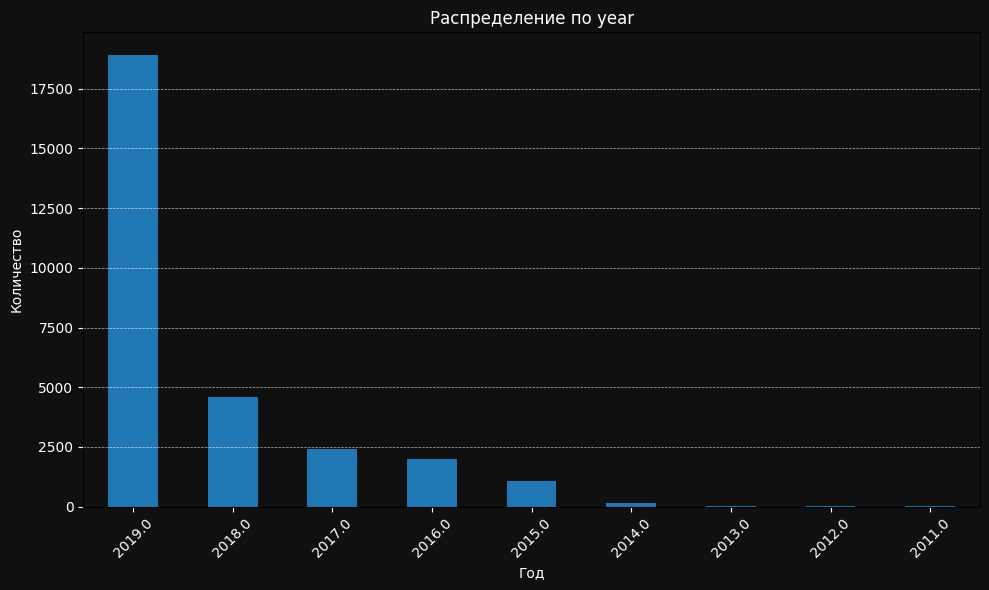

In [ ]:
counts = df['year'].value_counts()

plt.figure(figsize=(10, 6))
counts.plot(kind='bar')
plt.title('Распределение по year')
plt.xlabel('Год')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis="x", linestyle="", alpha=0.7)
plt.tight_layout()
plt.show()

### Видим, что чаще всего встречается 2019 и 2018 год

### Сгуппируем по типу дома и посмотрим среднее значение таргета

In [ ]:
average_price_by_type = df.groupby('type_house')['target'].mean().reset_index()
print(average_price_by_type)

        type_house      target
0  Entire home/apt  111.557934
1     Private room  111.474826
2      Shared room  163.808000


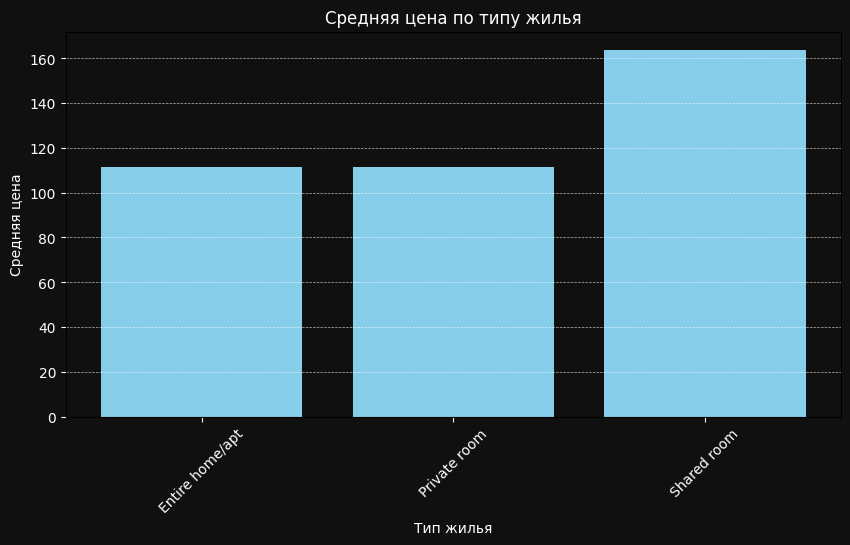

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(average_price_by_type['type_house'], average_price_by_type['target'], color='skyblue')
plt.xlabel('Тип жилья')
plt.ylabel('Средняя цена')
plt.title('Средняя цена по типу жилья')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis="x", linestyle="", alpha=0.7)
plt.show()


### Видим, что дороже всего в среднем shared room, а вот остальные два типа примерно одинаковы по стоимости

### Нам дан кластер
### Попробуем в зависисмости от кластера типа дома и года построить графики

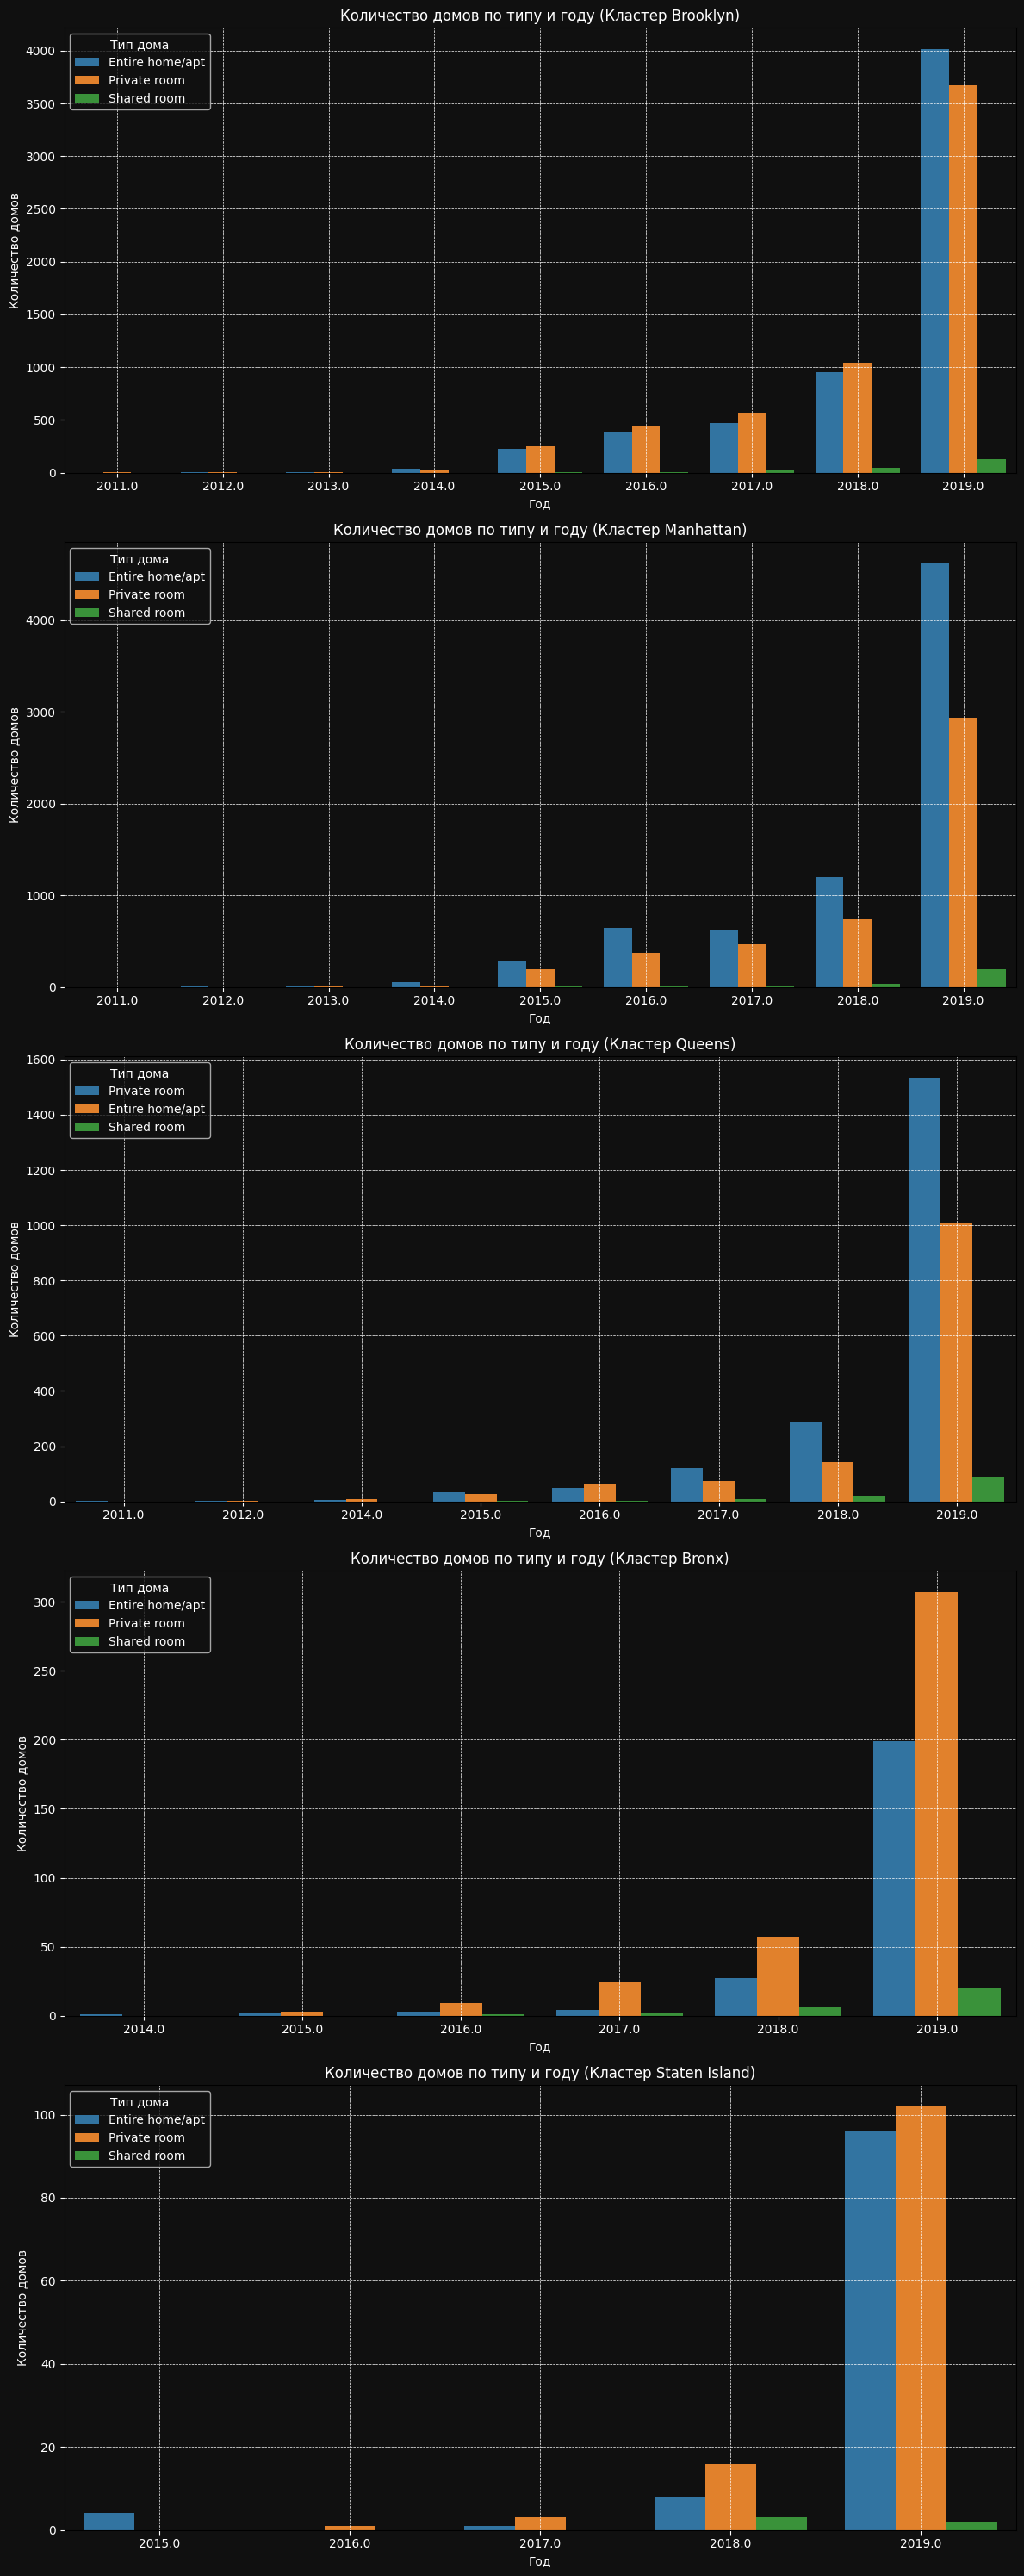

In [ ]:

count_by_type_year_cluster = df.groupby(['type_house', 'year', 'location_cluster']).size().reset_index(name='count')

clusters = count_by_type_year_cluster['location_cluster'].unique()

fig, axes = plt.subplots(nrows=len(clusters), figsize=(12, 6 * len(clusters)))

for i, cluster in enumerate(clusters):
    ax = axes[i] if len(clusters) > 1 else axes
    subset = count_by_type_year_cluster[count_by_type_year_cluster['location_cluster'] == cluster]
    sns.barplot(data=subset, x='year', y='count', hue='type_house', ax=ax)
    ax.set_title(f'Количество домов по типу и году (Кластер {cluster})')
    ax.set_xlabel('Год')
    ax.set_ylabel('Количество домов')
    ax.legend(title='Тип дома')
    ax.grid(True)

plt.tight_layout()
plt.show()

### Видим, что преобладает private room в кластере Staten Island и Bronx, а вот в кластере Queens и Manhatten - Entire home/apt, в Brooklyn до 2019 преобладал - private room, а в 2019 году - Entire home/apt.

### Теперь посмотрим на количество пропусков в каждом кластере

In [ ]:
missing_year_df = df[df['year'].isna()]
missing_by_cluster = missing_year_df.groupby('location_cluster').size().reset_index(name='missing_count')

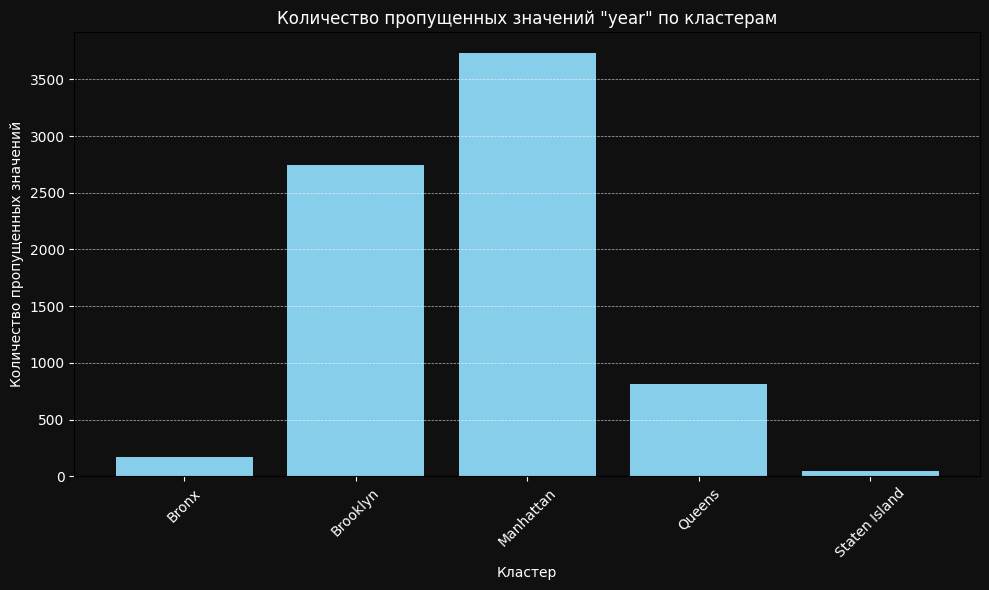

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(missing_by_cluster['location_cluster'], missing_by_cluster['missing_count'], color='skyblue')

plt.title('Количество пропущенных значений "year" по кластерам')
plt.xlabel('Кластер')
plt.ylabel('Количество пропущенных значений')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='', alpha=0.7)
plt.tight_layout()
plt.show()

### Больше всего пропусков в кластере Manhattan и Brooklyn

### Теперь посмотрим пропуски в зависимости от типа дома и кластера, чтоб заполнить пропуски

In [ ]:
missing_by_cluster_type = missing_year_df.groupby(['location_cluster', 'type_house']).size().reset_index(name='missing_count')
print(missing_by_cluster_type)

   location_cluster       type_house  missing_count
0             Bronx  Entire home/apt             58
1             Bronx     Private room            100
2             Bronx      Shared room             13
3          Brooklyn  Entire home/apt           1045
4          Brooklyn     Private room           1602
5          Brooklyn      Shared room             96
6         Manhattan  Entire home/apt           2383
7         Manhattan     Private room           1251
8         Manhattan      Shared room             94
9            Queens  Entire home/apt            263
10           Queens     Private room            508
11           Queens      Shared room             41
12    Staten Island  Entire home/apt             22
13    Staten Island     Private room             22
14    Staten Island      Shared room              4


### Заполним пропуски в признаке year - сгруппируем по кластеру в зависимости от типа дома и года- возьмем моду

In [ ]:
mode_year_by_area_and_type = df.groupby(['location_cluster', 'type_house'])['year'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

df['year'] = df.apply(
    lambda row: mode_year_by_area_and_type.get((row['location_cluster'], row['type_house']), row['year'])
    if pd.isna(row['year']) else row['year'], axis=1
)
print(df.isna().sum())

name                   9
_id                    0
host_name             18
location_cluster       0
location               0
lat                    0
lon                    0
type_house             0
sum                    0
min_days               0
amt_reviews            0
last_dt             7502
avg_reviews         7502
total_host             0
target                 0
year                   0
month               7502
hour                7502
day_of_week         7502
dtype: int64


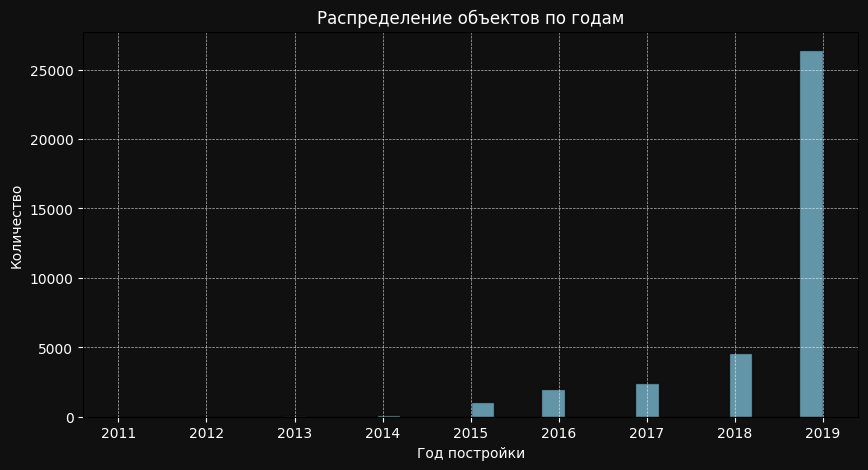

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(df['year'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Год постройки')
plt.ylabel('Количество')
plt.title('Распределение объектов по годам')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### Больше всего было построено в 2019 и 2018 году

In [ ]:
mode_year_by_area_and_type = test_df.groupby(['location_cluster', 'type_house'])['year'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

test_df['year'] = test_df.apply(
    lambda row: mode_year_by_area_and_type.get((row['location_cluster'], row['type_house']), row['year'])
    if pd.isna(row['year']) else row['year'], axis=1
)

print(test_df.isna().sum())

name                   7
_id                    0
host_name              3
location_cluster       0
location               0
lat                    0
lon                    0
type_house             0
sum                    0
min_days               0
amt_reviews            0
last_dt             2550
avg_reviews         2550
total_host             0
year                   0
month               2550
hour                2550
day_of_week         2550
dtype: int64


### Теперь надо заполнить пропуски для месяца
### Заполняем аналогично году

In [ ]:
mode_month_by_area_and_type = df.groupby(['location_cluster', 'type_house'])['month'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

df['month'] = df.apply(
    lambda row: mode_month_by_area_and_type.get((row['location_cluster'], row['type_house']), row['month'])
    if pd.isna(row['month']) else row['month'], axis=1
)

print(df.isna().sum())


name                   9
_id                    0
host_name             18
location_cluster       0
location               0
lat                    0
lon                    0
type_house             0
sum                    0
min_days               0
amt_reviews            0
last_dt             7502
avg_reviews         7502
total_host             0
target                 0
year                   0
month                  0
hour                7502
day_of_week         7502
dtype: int64


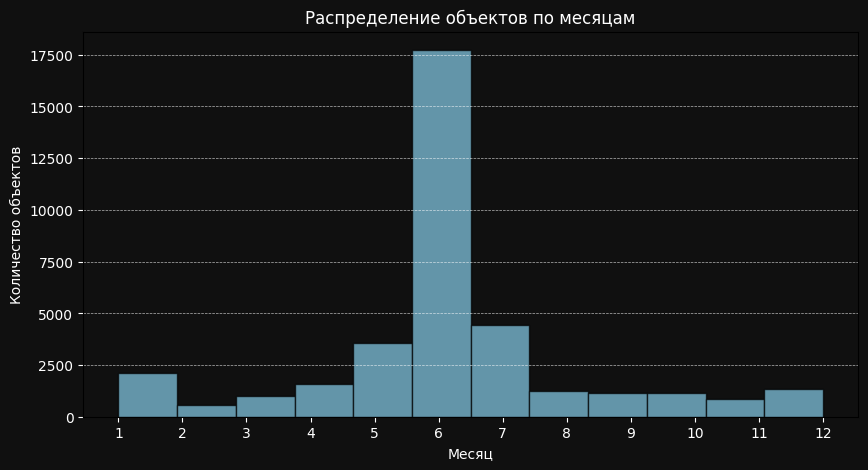

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(df['month'], bins=12, color='skyblue', edgecolor='black', alpha=0.7)
plt.xticks(range(1, 13))
plt.xlabel('Месяц')
plt.ylabel('Количество объектов')
plt.title('Распределение объектов по месяцам')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='', alpha=0.7)
plt.show()


### Видим, что чаще всего оставляли отзывы и бронировали с мая по июль

### Теперь аналогично году заполним пропуски в колонке month в зависимости от кластера и типа дома

In [ ]:
mode_month_by_area_and_type = test_df.groupby(['location_cluster', 'type_house'])['month'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

test_df['month'] = test_df.apply(
    lambda row: mode_month_by_area_and_type.get((row['location_cluster'], row['type_house']), row['month'])
    if pd.isna(row['month']) else row['month'], axis=1
)

print(test_df.isna().sum())

name                   7
_id                    0
host_name              3
location_cluster       0
location               0
lat                    0
lon                    0
type_house             0
sum                    0
min_days               0
amt_reviews            0
last_dt             2550
avg_reviews         2550
total_host             0
year                   0
month                  0
hour                2550
day_of_week         2550
dtype: int64


### Аналогично заполним пропуски в колонке день недели

In [ ]:
mode_month_by_area_and_type = df.groupby(['location_cluster', 'type_house'])['day_of_week'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

df['day_of_week'] = df.apply(
    lambda row: mode_month_by_area_and_type.get((row['location_cluster'], row['type_house']), row['day_of_week'])
    if pd.isna(row['day_of_week']) else row['day_of_week'], axis=1
)

print(df.isna().sum())


name                   9
_id                    0
host_name             18
location_cluster       0
location               0
lat                    0
lon                    0
type_house             0
sum                    0
min_days               0
amt_reviews            0
last_dt             7502
avg_reviews         7502
total_host             0
target                 0
year                   0
month                  0
hour                7502
day_of_week            0
dtype: int64


### Построим распределение по дням недели

<ipython-input-29-d929157c2b0e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_counts.index, y=day_counts.values, palette='coolwarm')


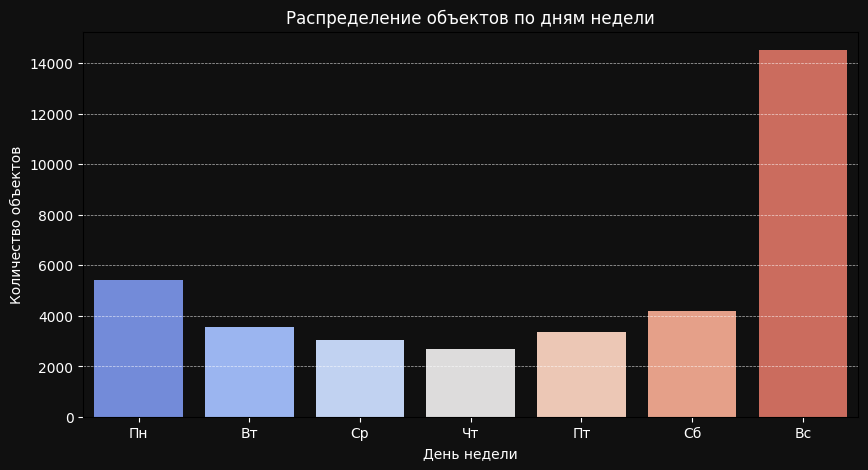

In [ ]:
day_counts = df['day_of_week'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.barplot(x=day_counts.index, y=day_counts.values, palette='coolwarm')

plt.xlabel('День недели')
plt.ylabel('Количество объектов')
plt.title('Распределение объектов по дням недели')
plt.xticks(ticks=range(7), labels=['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'])  # Подписи оси X
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Воскресенье и понедельник преобладают для даты последнего отзыва или последнего бронирования.

In [ ]:
mode_month_by_area_and_type = test_df.groupby(['location_cluster', 'type_house'])['day_of_week'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

test_df['day_of_week'] = test_df.apply(
    lambda row: mode_month_by_area_and_type.get((row['location_cluster'], row['type_house']), row['day_of_week'])
    if pd.isna(row['day_of_week']) else row['day_of_week'], axis=1
)
print(test_df.isna().sum())

name                   7
_id                    0
host_name              3
location_cluster       0
location               0
lat                    0
lon                    0
type_house             0
sum                    0
min_days               0
amt_reviews            0
last_dt             2550
avg_reviews         2550
total_host             0
year                   0
month                  0
hour                2550
day_of_week            0
dtype: int64


### Заполним пропуски в часах модой в зависимости от кластера и типа дома

In [ ]:
mode_month_by_area_and_type = df.groupby(['location_cluster', 'type_house'])['hour'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

df['hour'] = df.apply(
    lambda row: mode_month_by_area_and_type.get((row['location_cluster'], row['type_house']), row['hour'])
    if pd.isna(row['hour']) else row['hour'], axis=1
)

print(df.isna().sum())

name                   9
_id                    0
host_name             18
location_cluster       0
location               0
lat                    0
lon                    0
type_house             0
sum                    0
min_days               0
amt_reviews            0
last_dt             7502
avg_reviews         7502
total_host             0
target                 0
year                   0
month                  0
hour                   0
day_of_week            0
dtype: int64


In [ ]:
mode_month_by_area_and_type = test_df.groupby(['location_cluster', 'type_house'])['hour'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

test_df['hour'] = test_df.apply(
    lambda row: mode_month_by_area_and_type.get((row['location_cluster'], row['type_house']), row['hour'])
    if pd.isna(row['hour']) else row['hour'], axis=1
)

print(test_df.isna().sum())

name                   7
_id                    0
host_name              3
location_cluster       0
location               0
lat                    0
lon                    0
type_house             0
sum                    0
min_days               0
amt_reviews            0
last_dt             2550
avg_reviews         2550
total_host             0
year                   0
month                  0
hour                   0
day_of_week            0
dtype: int64


### Теперь удалим признак last_dt так как мы заполнили все пропуски

In [ ]:
df = df.drop(columns='last_dt')
test_df = test_df.drop(columns='last_dt')

### заполним пропуски в host_name модой в зависимоти от кластера и типа дома

In [ ]:
mode_month_by_area_and_type = df.groupby(['location_cluster', 'type_house'])['host_name'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

df['host_name'] = df.apply(
    lambda row: mode_month_by_area_and_type.get((row['location_cluster'], row['type_house']), row['host_name'])
    if pd.isna(row['host_name']) else row['host_name'], axis=1
)
print(df.isna().sum())

name                   9
_id                    0
host_name              0
location_cluster       0
location               0
lat                    0
lon                    0
type_house             0
sum                    0
min_days               0
amt_reviews            0
avg_reviews         7502
total_host             0
target                 0
year                   0
month                  0
hour                   0
day_of_week            0
dtype: int64


In [ ]:
mode_month_by_area_and_type = test_df.groupby(['location_cluster', 'type_house'])['host_name'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

test_df['host_name'] = test_df.apply(
    lambda row: mode_month_by_area_and_type.get((row['location_cluster'], row['type_house']), row['host_name'])
    if pd.isna(row['host_name']) else row['host_name'], axis=1
)

print(test_df.isna().sum())

name                   7
_id                    0
host_name              0
location_cluster       0
location               0
lat                    0
lon                    0
type_house             0
sum                    0
min_days               0
amt_reviews            0
avg_reviews         2550
total_host             0
year                   0
month                  0
hour                   0
day_of_week            0
dtype: int64


### Удалим колонку имя так как она ни на что не влияет(максимум имя встречается 14 раз)

In [ ]:
df = df.drop(columns=['name'])

In [ ]:
test_df = test_df.drop(columns=['name'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36671 entries, 0 to 36670
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   _id               36671 non-null  int64  
 1   host_name         36671 non-null  object 
 2   location_cluster  36671 non-null  object 
 3   location          36671 non-null  object 
 4   lat               36671 non-null  float64
 5   lon               36671 non-null  float64
 6   type_house        36671 non-null  object 
 7   sum               36671 non-null  int64  
 8   min_days          36671 non-null  int64  
 9   amt_reviews       36671 non-null  int64  
 10  avg_reviews       29169 non-null  float64
 11  total_host        36671 non-null  int64  
 12  target            36671 non-null  int64  
 13  year              36671 non-null  float64
 14  month             36671 non-null  float64
 15  hour              36671 non-null  float64
 16  day_of_week       36671 non-null  float6

### заполним пропуски средним в колонке avg_reviews в зависимости от локации, так как локация объединяются в кластеры
### если пропуски все равно остались то берем среднее уже по кластеру

In [ ]:
df['avg_reviews'] = df.groupby('location')['avg_reviews'].transform(lambda x: x.fillna(x.mean()))

df['avg_reviews'] = df.groupby('location_cluster')['avg_reviews'].transform(lambda x: x.fillna(x.mean()))

### Посмотрим на распределение средней оценки по отзывам

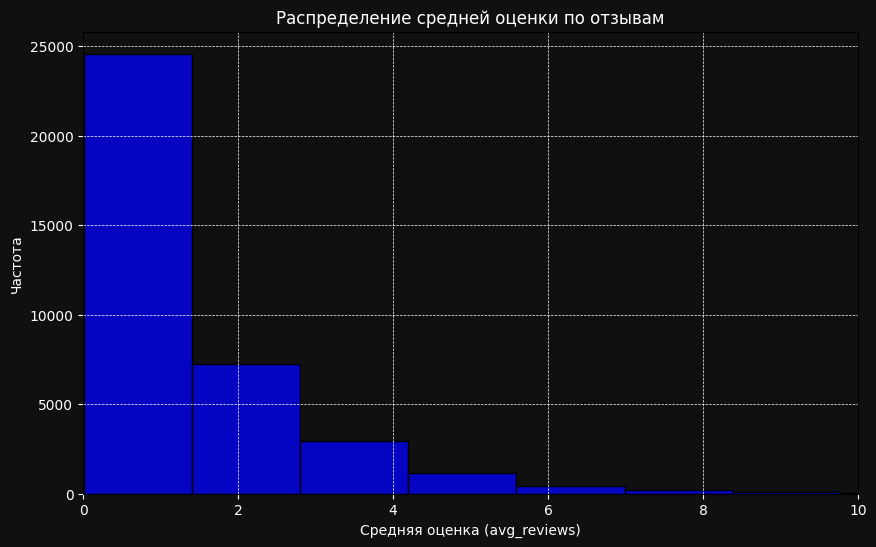

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['avg_reviews'], bins=15, color='blue')
plt.xlabel("Средняя оценка (avg_reviews)")
plt.ylabel("Частота")
plt.title("Распределение средней оценки по отзывам")
plt.grid(True)

plt.xlim(0, 10)
plt.show()

### Средняя оценка довольна низкая => большинство пользователей не удовлетворены отдыхом

In [ ]:
test_df['avg_reviews'] = test_df.groupby('location')['avg_reviews'].transform(lambda x: x.fillna(x.mean()))
test_df['avg_reviews'] = test_df.groupby('location_cluster')['avg_reviews'].transform(lambda x: x.fillna(x.mean()))

### Построим матрицу корреляции признаков

In [ ]:
import numpy as np

In [ ]:
df_copy = df.copy()
df_copy.drop(columns=['type_house'], inplace=True)
df_copy.drop(columns=['host_name', 'location', 'location_cluster', 'hour'], inplace=True)

<Axes: >

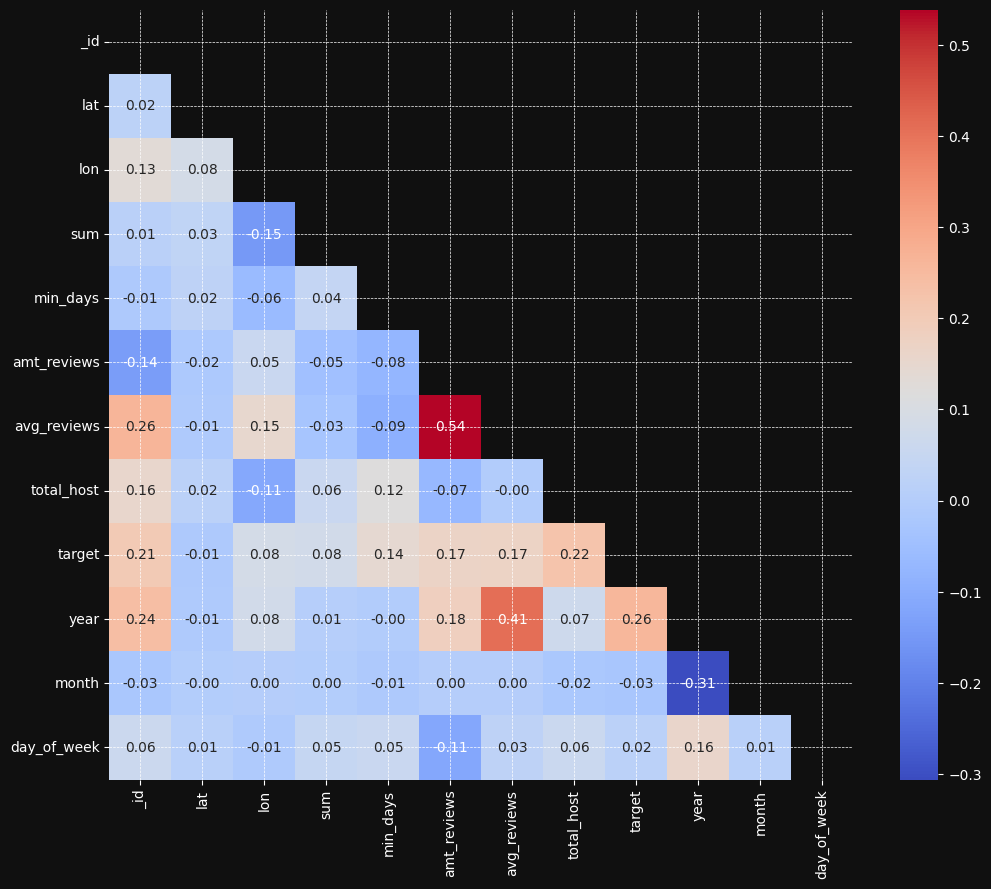

In [ ]:
corr_matrix = df_copy.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", mask=mask)

### видим, что на таргет влияет id, min_days, amt_reviews, avg_reviews, total_host, year

# Дальше я попробовала обучить 5 разных моделей и подобрать параметры с помощью optuna

In [ ]:
solution = pd.read_csv('solution.csv')

In [ ]:
solution.head()

,index,prediction,Usage
0,0,359,Public
1,1,343,Public
2,2,365,Public
3,3,34,Public
4,4,15,Private


## 1. CatboostRegressor

In [ ]:
!pip install catboost

In [ ]:
from sklearn.model_selection import StratifiedKFold
from catboost import CatBoostRegressor, Pool
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.base import clone

In [ ]:
X = df.drop(columns=['target'])

y = df['target']
model_pred ={}

In [ ]:
from catboost import CatBoostRegressor, Pool
cat_features = ['host_name', 'location', 'location_cluster', 'type_house']

In [ ]:
cb_params = {
    'iterations'           : 2000,
    'depth'                : 5,
    'learning_rate'        : 0.06,
    'loss_function'        : 'RMSE',
    'random_seed'          : 42,
    'verbose'              : 0,
    'early_stopping_rounds': 100,
    'use_best_model'       : True
}
cb_template = CatBoostRegressor(**cb_params)

In [ ]:
skf = KFold(n_splits=5, shuffle=True, random_state=42)
oof_preds = np.zeros(len(X))
fold_rmses = []

In [ ]:
for fold, (tr_idx, va_idx) in enumerate(skf.split(X), 1):
    X_tr, X_va = X.iloc[tr_idx], X.iloc[va_idx]
    y_tr, y_va = y.iloc[tr_idx], y.iloc[va_idx]

    model = clone(cb_template)
    model.fit(
        X_tr, y_tr,
        cat_features=cat_features,
        eval_set=[(X_va, y_va)]
    )

    preds = model.predict(X_va)
    oof_preds[va_idx] = preds
    mse = mean_squared_error(y_va, preds)
    fold_rmses.append(mse)
    print(f"Fold {fold} MSE: {mse:.4f}")

Fold 1 MSE: 9835.8441
Fold 2 MSE: 9683.9124
Fold 3 MSE: 9339.4407
Fold 4 MSE: 9324.9612
Fold 5 MSE: 9544.9064


In [ ]:
print(f"Mean CV MSE: {np.mean(fold_rmses):.4f}")

Mean CV MSE: 9545.8129


### Мне стало интересно, какой бы у меня был скор с такими параметрами на итоговом лидер борде, ибо я ошиблась и отправила не тот файл..

In [ ]:
final_cb = CatBoostRegressor(**cb_params)
final_cb.fit(
    X, y,
    cat_features=cat_features,
    eval_set=[(X, y)],
    verbose=False
)

In [ ]:
X_test = test_df.copy()
y_true = solution['prediction']

In [ ]:
y_pred = final_cb.predict(X_test)

mse  = mean_squared_error(y_true, y_pred)
print(f"Test MSE:  {mse:.4f}")

Test MSE:  9482.4663


In [ ]:
model_pred['cb'] = mse

In [ ]:
model_pred

{'cb': 9482.466302848676}

## 2. lightgbm и я попробовала подобрать параметры с помощью optuna

In [ ]:
!pip install optuna

In [ ]:
!pip install optuna-integration[lightgbm]

###подобрать параметры для lgbm чтоб было лучше

In [ ]:
import optuna
import lightgbm as lgb

In [ ]:
cat_cols = ['host_name', 'location', 'location_cluster', 'type_house']
for c in cat_cols:
    X[c] = X[c].astype('category')

In [ ]:
y_binned = pd.qcut(y, q=5, labels=False, duplicates='drop')

In [ ]:
oof_preds  = np.zeros(len(X))
fold_rmses = []

### Первый раз я попробовла сама задать параметры, далее подбирала на основе optuna

In [ ]:
def objective_lgb(trial):
    params = {
        'objective'        : 'regression',
        'metric'           : 'l2',
        'random_state'     : 42,
        'verbosity'        : -1,
        'n_estimators'     : trial.suggest_int('n_estimators', 400, 1000),
        'max_depth'        : trial.suggest_int('max_depth', 6, 20),
        'learning_rate'    : trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
        'num_leaves'       : trial.suggest_int('num_leaves', 20, 100),
        'min_data_in_leaf' : trial.suggest_int('min_data_in_leaf', 5, 50),
        'lambda_l1'        : trial.suggest_loguniform('lambda_l1', 1e-3, 10.0),
        'lambda_l2'        : trial.suggest_loguniform('lambda_l2', 1e-3, 1.0),
        'feature_fraction' : trial.suggest_uniform('feature_fraction', 0.4, 1.0),
        'bagging_fraction' : trial.suggest_uniform('bagging_fraction', 0.4, 1.0),
        'bagging_freq'     : trial.suggest_int('bagging_freq', 1, 10),
    }

    mses = []
    for tr_idx, va_idx in skf.split(X, y_binned):
        X_tr, X_va = X.iloc[tr_idx], X.iloc[va_idx]
        y_tr, y_va = y.iloc[tr_idx], y.iloc[va_idx]

        model = lgb.LGBMRegressor(**params)
        model.fit(
            X_tr, y_tr,
            eval_set=[(X_va, y_va)],
            eval_metric='l2',
            callbacks=[
                lgb.early_stopping(stopping_rounds=50),
                optuna.integration.LightGBMPruningCallback(trial, 'l2')
            ]
        )

        preds = model.predict(X_va)
        mses.append(np.mean((y_va - preds) ** 2))

    return np.mean(mses)

In [ ]:
study_lgb = optuna.create_study(
    direction='minimize',
    sampler=optuna.samplers.TPESampler(seed=42),
    pruner=optuna.pruners.SuccessiveHalvingPruner()
)

In [ ]:
study_lgb.optimize(objective_lgb, n_trials=15, n_jobs=1)

print("Лучшие гиперпараметры LGBM:", study_lgb.best_params)

###Лучшие гиперпараметры LGBM: {'n_estimators': 625, 'max_depth': 20, 'learning_rate': 0.015702970884055395, 'num_leaves': 68, 'min_data_in_leaf': 12, 'lambda_l1': 0.004207053950287938, 'lambda_l2': 0.0014936568554617625, 'feature_fraction': 0.9197056874649611, 'bagging_fraction': 0.7606690070459252, 'bagging_freq': 8}

In [ ]:
best_params = {
               'n_estimators': 591,
               'max_depth': 13,
               'learning_rate': 0.0438940272415157,
               'num_leaves': 96,
               'min_data_in_leaf': 28,
               'lambda_l1': 1.4682958475343297,
               'lambda_l2': 0.008849864290298196,
               'feature_fraction': 0.4756587441544086,
               'bagging_fraction': 0.8825034798122532,
               'bagging_freq': 8
               }

In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
lgb_template = lgb.LGBMRegressor(**best_params)

fold_rmses = []

for fold, (tr_idx, va_idx) in enumerate(skf.split(X), 1):
    X_tr, X_va = X.iloc[tr_idx], X.iloc[va_idx]
    y_tr, y_va = y.iloc[tr_idx], y.iloc[va_idx]

    model = clone(lgb_template)

    model.fit(
        X_tr, y_tr,
        eval_set=[(X_va, y_va)],
        eval_metric='l2',
        callbacks=[lgb.early_stopping(stopping_rounds=100)],
        categorical_feature=cat_cols
    )

    preds_va = model.predict(X_va)
    oof_preds[va_idx] = preds_va

    rmse = np.sqrt(mean_squared_error(y_va, preds_va))
    fold_rmses.append(rmse)
    print(f"Fold {fold} RMSE: {rmse:.4f}")

print(f"\nMean CV MSE: {np.mean(fold_rmses) **2:.4f}")

### Получили mean cv mse: 9798.38

### Проверим оценку на solution.csv

In [ ]:
for c in cat_cols:
    test_df[c] = test_df[c].astype('category')

In [ ]:
lgb_template = LGBMRegressor(**best_params)
lgb_template.fit(
    X, y,
    eval_set=[(X, y)],
    eval_metric='l2',
    callbacks=[  # ранняя остановка при необходимости
        lambda env: env.model.stop_training() if env.iteration > best_params['n_estimators'] else None
    ],
    categorical_feature=cat_cols
)

X_test = test_df.copy()
y_true = solution['prediction']

y_pred = lgb_template.predict(test_df)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)

print(f"Test MSE:  {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")

[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] feature_fraction is set=0.4756587441544086, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4756587441544086
[LightGBM] [Warning] lambda_l2 is set=0.008849864290298196, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.008849864290298196
[LightGBM] [Warning] lambda_l1 is set=1.4682958475343297, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4682958475343297
[LightGBM] [Warning] bagging_fraction is set=0.8825034798122532, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8825034798122532
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored wi

In [ ]:
model_pred['lgb'] = mse

In [ ]:
model_pred

{'cb': 9482.466302848676, 'lgb': 9708.149826686062}

## 3. linear Regression + Category_encoder для категориальных признаков

In [ ]:
!pip install category_encoders

In [ ]:
from sklearn.linear_model import LinearRegression
optuna.logging.set_verbosity(optuna.logging.WARNING)
import category_encoders as ce

In [ ]:
encoder = ce.CatBoostEncoder(cols=cat_cols, random_state=42)
X_cb = encoder.fit_transform(X[cat_cols], y).add_suffix('_cb')
X_final = pd.concat([X.drop(columns=cat_cols), X_cb], axis=1)

In [ ]:
mse_list = []

for fold, (tr_idx, te_idx) in enumerate(skf.split(X_final), start=1):
    X_tr, X_te = X_final.iloc[tr_idx], X_final.iloc[te_idx]
    y_tr, y_te = y.iloc[tr_idx], y.iloc[te_idx]

    lin_model = LinearRegression()
    lin_model.fit(X_tr, y_tr)
    preds = lin_model.predict(X_te)
    mse = mean_squared_error(y_te, preds)
    mse_list.append(mse)
    print(f"Fold {fold} MSE: {mse:.4f}")

mse_arr = np.array(mse_list)
print(f"\nMean CV MSE: {mse_arr.mean():.4f}")

Fold 1 MSE: 12975.1365
Fold 2 MSE: 13274.8524
Fold 3 MSE: 12715.7034
Fold 4 MSE: 12544.4307
Fold 5 MSE: 12791.2826

Mean CV MSE: 12860.2811


### Предсказание на тестовой выборке

In [ ]:
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

encoder = ce.CatBoostEncoder(cols=cat_cols, random_state=42)
X_cb = encoder.fit_transform(X[cat_cols], y).add_suffix('_cb')
X_proc = pd.concat([X.drop(columns=cat_cols), X_cb], axis=1)

X_test_cb = encoder.transform(test_df[cat_cols]).add_suffix('_cb')
X_test_proc = pd.concat([test_df.drop(columns=cat_cols), X_test_cb], axis=1)

In [ ]:
lin_model = LinearRegression()
lin_model.fit(X_proc, y)
y_pred = lin_model.predict(X_test_proc)
mse  = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)

print(f"Lr Test MSE:  {mse:.4f}")
print(f"Lr Test RMSE: {rmse:.4f}")

Lr Test MSE:  12554.2781
Lr Test RMSE: 112.0459


In [ ]:
model_pred['Lr'] = mse

## 4. KNN Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
optuna.logging.set_verbosity(optuna.logging.WARNING)

In [ ]:
def objective(trial):
    params = {
        'n_neighbors': trial.suggest_int('n_neighbors', 2, 30),
        'weights': trial.suggest_categorical('weights', ['uniform', 'distance']),
        'p': trial.suggest_int('p', 1, 2),
        'n_jobs': -1
    }

    mses = []

    for tr_idx, va_idx in skf.split(X, y_binned):
        X_tr, X_va = X.iloc[tr_idx].copy(), X.iloc[va_idx].copy()
        y_tr, y_va = y.iloc[tr_idx], y.iloc[va_idx]

        encoder = ce.CatBoostEncoder(cols=cat_cols, random_state=42)
        encoder.fit(X_tr[cat_cols], y_tr)

        X_tr_cb = encoder.transform(X_tr[cat_cols]).add_suffix('_cb')
        X_va_cb = encoder.transform(X_va[cat_cols]).add_suffix('_cb')

        X_tr_proc = pd.concat([X_tr.drop(columns=cat_cols), X_tr_cb], axis=1)
        X_va_proc = pd.concat([X_va.drop(columns=cat_cols), X_va_cb], axis=1)

        model = KNeighborsRegressor(**params)
        model.fit(X_tr_proc, y_tr)
        preds = model.predict(X_va_proc)
        mses.append(mean_squared_error(y_va, preds))

    mse_mean = float(np.mean(mses))
    print(f"Trial {trial.number:>2} • MSE: {mse_mean:.4f} • params: {params}")
    return mse_mean

In [ ]:
study = optuna.create_study(
    direction='minimize',
    sampler=optuna.samplers.TPESampler(seed=42)
)
study.optimize(objective, n_trials=15, n_jobs=1)

Trial  0 • MSE: 15586.3201 • params: {'n_neighbors': 12, 'weights': 'uniform', 'p': 2, 'n_jobs': -1}
Trial  1 • MSE: 15977.0829 • params: {'n_neighbors': 6, 'weights': 'uniform', 'p': 2, 'n_jobs': -1}
Trial  2 • MSE: 15543.6743 • params: {'n_neighbors': 19, 'weights': 'uniform', 'p': 2, 'n_jobs': -1}
Trial  3 • MSE: 15590.4501 • params: {'n_neighbors': 26, 'weights': 'uniform', 'p': 1, 'n_jobs': -1}
Trial  4 • MSE: 15599.7025 • params: {'n_neighbors': 10, 'weights': 'uniform', 'p': 1, 'n_jobs': -1}
Trial  5 • MSE: 14155.3893 • params: {'n_neighbors': 19, 'weights': 'distance', 'p': 1, 'n_jobs': -1}
Trial  6 • MSE: 15556.7282 • params: {'n_neighbors': 15, 'weights': 'uniform', 'p': 2, 'n_jobs': -1}
Trial  7 • MSE: 14155.3893 • params: {'n_neighbors': 19, 'weights': 'distance', 'p': 1, 'n_jobs': -1}
Trial  8 • MSE: 17112.4815 • params: {'n_neighbors': 3, 'weights': 'distance', 'p': 2, 'n_jobs': -1}
Trial  9 • MSE: 14692.3290 • params: {'n_neighbors': 10, 'weights': 'distance', 'p': 1, 'n

In [ ]:
print("\nЛучшие гиперпараметры KNN:")
for k, v in study.best_params.items():
    print(f"  • {k}: {v}")
print(f"Mean CV MSE: {study.best_value:.4f}")


Лучшие гиперпараметры KNN:
  • n_neighbors: 30
  • weights: distance
  • p: 1
Mean CV MSE: 13894.3168


In [ ]:
mse_list = []

for fold, (tr_idx, te_idx) in enumerate(skf.split(X_final), start=1):
    X_tr, X_te = X_final.iloc[tr_idx], X_final.iloc[te_idx]
    y_tr, y_te = y.iloc[tr_idx], y.iloc[te_idx]

    knn_model = KNeighborsRegressor(**study.best_params)
    knn_model.fit(X_tr, y_tr)
    preds = knn_model.predict(X_te)
    mse = mean_squared_error(y_te, preds)
    mse_list.append(mse)
    print(f"Fold {fold} MSE: {mse:.4f}")

mse_arr = np.array(mse_list)
print(f"\nMean CV MSE: {mse_arr.mean():.4f}")

Fold 1 MSE: 14037.5699
Fold 2 MSE: 14004.4668
Fold 3 MSE: 13876.2361
Fold 4 MSE: 13763.9961
Fold 5 MSE: 14010.3524

Mean CV MSE: 13938.5243


### Найдем ошибку на тестовых данных

In [ ]:
best_knn = KNeighborsRegressor(**study.best_params, n_jobs=-1)

best_knn.fit(X_proc, y)
y_pred = best_knn.predict(X_test_proc)

mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
print(f"KNN Test MSE:  {mse:.4f}")
print(f"KNN Test RMSE: {rmse:.4f}")

KNN Test MSE:  13785.7884
KNN Test RMSE: 117.4129


In [ ]:
model_pred['knn'] = mse

## 5. Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
def objective(trial):
    params = {
        'n_estimators'     : trial.suggest_int('n_estimators', 100, 500),
        'max_depth'        : trial.suggest_int('max_depth', 2, 20),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf' : trial.suggest_int('min_samples_leaf', 1, 7),
        'max_features'     : trial.suggest_categorical('max_features', ['sqrt','log2', None]),
        'bootstrap'        : trial.suggest_categorical('bootstrap', [True, False]),
        'random_state'     : 42,
        'n_jobs'           : -1
    }
    if params['bootstrap']:
        params['max_samples'] = trial.suggest_float('max_samples', 0.5, 1.0)

    mses = []
    for tr_idx, va_idx in skf.split(X, y_binned):
        X_tr, X_va = X.iloc[tr_idx].copy(), X.iloc[va_idx].copy()
        y_tr, y_va = y.iloc[tr_idx], y.iloc[va_idx]

        encoder = ce.CatBoostEncoder(cols=cat_cols, random_state=42)
        encoder.fit(X_tr[cat_cols], y_tr)

        X_tr_cb = encoder.transform(X_tr[cat_cols]).add_suffix('_cb')
        X_va_cb = encoder.transform(X_va[cat_cols]).add_suffix('_cb')

        X_tr_proc = pd.concat([X_tr.drop(columns=cat_cols), X_tr_cb], axis=1)
        X_va_proc = pd.concat([X_va.drop(columns=cat_cols), X_va_cb], axis=1)

        model = RandomForestRegressor(**params)
        model.fit(X_tr_proc, y_tr)
        preds = model.predict(X_va_proc)
        mses.append(mean_squared_error(y_va, preds))

    mse_mean = float(np.mean(mses))
    print(f"Trial {trial.number:>2} • MSE: {mse_mean:.4f} • params: {params}")
    return mse_mean

In [ ]:
optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(
    direction='minimize',
    sampler=optuna.samplers.TPESampler(seed=42)
)
study.optimize(objective, n_trials=15, n_jobs=1)

print("\nЛучшие гиперпараметры RandomForest:")
for k, v in study.best_params.items():
    print(f"  • {k}: {v}")
print(f"Mean CV MSE: {study.best_value:.4f}")

Trial  0 • MSE: 10200.1314 • params: {'n_estimators': 250, 'max_depth': 20, 'min_samples_split': 15, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'bootstrap': True, 'random_state': 42, 'n_jobs': -1, 'max_samples': 0.8540362888980227}
Trial  1 • MSE: 10339.8935 • params: {'n_estimators': 108, 'max_depth': 20, 'min_samples_split': 17, 'min_samples_leaf': 2, 'max_features': None, 'bootstrap': True, 'random_state': 42, 'n_jobs': -1, 'max_samples': 0.645614570099021}
Trial  2 • MSE: 12063.2695 • params: {'n_estimators': 345, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 3, 'max_features': 'log2', 'bootstrap': False, 'random_state': 42, 'n_jobs': -1}
Trial  3 • MSE: 10337.7688 • params: {'n_estimators': 118, 'max_depth': 13, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': True, 'random_state': 42, 'n_jobs': -1, 'max_samples': 0.8421165132560784}
Trial  4 • MSE: 12062.4700 • params: {'n_estimators': 276, 'max_depth': 4, 'min_samples_split': 

### Я запускала оптуну несколько раз, ниже приведены параметры с наименьшей оценкой

In [ ]:
rf_params = {
    'n_estimators'      : 400,
    'max_depth'         : 25,
    'min_samples_split' : 10,
    'min_samples_leaf'  : 2,
    'max_features'      : 'log2',
    'bootstrap'         : False,
    'random_state'      : 42,
    'n_jobs'            : -1
}

In [ ]:
mse_list = []

for fold, (tr_idx, te_idx) in enumerate(skf.split(X_final), start=1):
    X_tr, X_te = X_final.iloc[tr_idx], X_final.iloc[te_idx]
    y_tr, y_te = y.iloc[tr_idx], y.iloc[te_idx]

    rf_model = RandomForestRegressor(**rf_params)
    rf_model.fit(X_tr, y_tr)
    preds = rf_model.predict(X_te)
    mse = mean_squared_error(y_te, preds)
    mse_list.append(mse)
    print(f"Fold {fold} MSE: {mse:.4f}")

mse_arr = np.array(mse_list)
print(f"\nMean CV MSE: {mse_arr.mean():.4f}")

Fold 1 MSE: 10197.7278
Fold 2 MSE: 10038.3594
Fold 3 MSE: 9793.7890
Fold 4 MSE: 9709.3596
Fold 5 MSE: 9928.2449

Mean CV MSE: 9933.4961


### Посмотрим на ошибку rf на тестовых данных

In [ ]:
rf = RandomForestRegressor(**rf_params)
rf.fit(X_proc, y)
y_pred = rf.predict(X_test_proc)
mse  = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)

print(f"rf Test MSE:  {mse:.4f}")
print(f"rf Test RMSE: {rmse:.4f}")

rf Test MSE:  9866.0475
rf Test RMSE: 99.3280


In [ ]:
model_pred['rf'] = mse

In [ ]:
model_pred

{'cb': 9482.466302848676,
 'lgb': 9708.149826686062,
 'Lr': 12554.278055037228,
 'knn': 13785.788400347094,
 'rf': 9866.047500382985}

## Строим ансамбль

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

In [ ]:
base_models={
    "rf": rf,
    "lgb": lgb_template,
    'lr': lin_model,
    'cb': final_cb,
    'knn': best_knn
}

### В качестве мета модели взяла Ridge

In [ ]:
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
preprocessor = ColumnTransformer([
    ('cat', ce.CatBoostEncoder(cols=cat_cols, random_state=42), cat_cols)
], remainder='passthrough', verbose_feature_names_out=False)

In [ ]:
adjusted_models = {}
for name, model in base_models.items():
    params = model.get_params()
    if 'use_best_model' in params:
        params['use_best_model'] = False
    adjusted_models[name] = model.__class__(**params)

In [ ]:
pipelines = {
    name: Pipeline([
        ('pre', preprocessor),
        ('model', adjusted_models[name])
    ]) for name in base_models
}

In [ ]:
meta_X_base = np.zeros((len(X), len(base_models)))
model_names = list(base_models.keys())

for idx, name in enumerate(model_names):
    pipe = pipelines[name]
    oof = np.zeros(len(X))
    for train_idx, valid_idx in skf.split(X, y.round()):
        pipe.fit(X.iloc[train_idx], y.iloc[train_idx])
        oof[valid_idx] = pipe.predict(X.iloc[valid_idx])
    meta_X_base[:, idx] = oof

### Обучаем мета модель Ridge с alpha=1.0

In [ ]:
rmses = []
for train_idx, valid_idx in skf.split(meta_X_base, y.round()):
    X_tr, X_va = meta_X_base[train_idx], meta_X_base[valid_idx]
    y_tr, y_va = y.iloc[train_idx], y.iloc[valid_idx]

    meta_model = Ridge(alpha=1.0)
    meta_model.fit(X_tr, y_tr)
    preds = meta_model.predict(X_va)
    rmse = np.sqrt(((preds - y_va) ** 2).mean())
    rmses.append(rmse)

print("Meta CV RMSE:", np.mean(rmses))

Meta CV RMSE: 97.39199974763287


### Теперь найдем предсказание для тестовых данных

In [ ]:
meta_X_test_base = np.zeros((len(X_test), len(base_models)))
for idx, name in enumerate(model_names):
    pipe = pipelines[name]
    pipe.fit(X, y)
    meta_X_test_base[:, idx] = pipe.predict(X_test)

In [ ]:
final_meta = Ridge(alpha=1.0)
final_meta.fit(meta_X_base, y)

y_pred = final_meta.predict(meta_X_test_base)

In [ ]:
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
print(f"Stacking Test MSE:  {mse:.4f}")
print(f"Stacking Test RMSE: {rmse:.4f}")

Stacking Test MSE:  9467.1547
Stacking Test RMSE: 97.2993


### Видим, что rmse на тесте эквивалентен Meta CV RMSE => стэкинг работает корректно

In [ ]:
model_pred['final'] = mse

#Визуализация и выводы

### При построение ансамбля я ориентировалась на матрицу корреляции

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

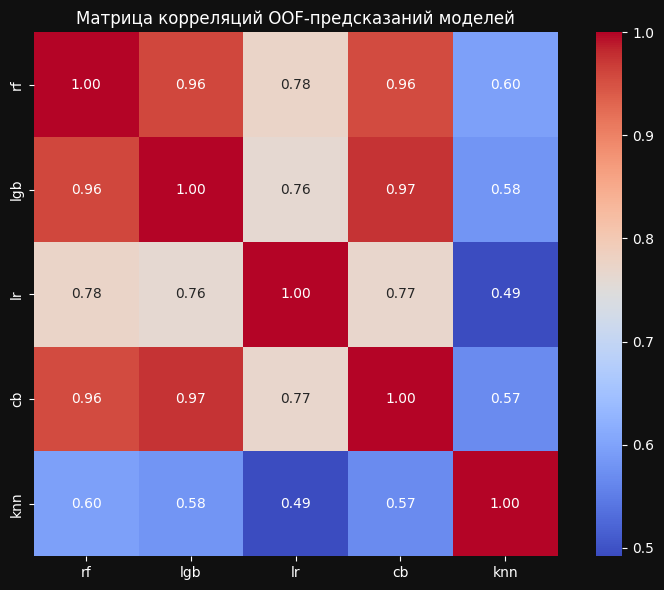

In [ ]:
meta_df = pd.DataFrame(meta_X_base, columns=model_names)
corr_matrix = meta_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Матрица корреляций OOF-предсказаний моделей")
plt.tight_layout()
plt.grid(axis='x', linestyle='', alpha=0.7)
plt.grid(axis='y', linestyle='', alpha=0.7)
plt.show()

In [ ]:
epistemic_uncertainty = meta_X_test_base.var(axis=1)
aleatoric_uncertainty = np.full_like(epistemic_uncertainty, fill_value=np.mean((y_true - y_pred) ** 2))
total_uncertainty = epistemic_uncertainty + aleatoric_uncertainty
squared_error = (y_pred - y_true) ** 2

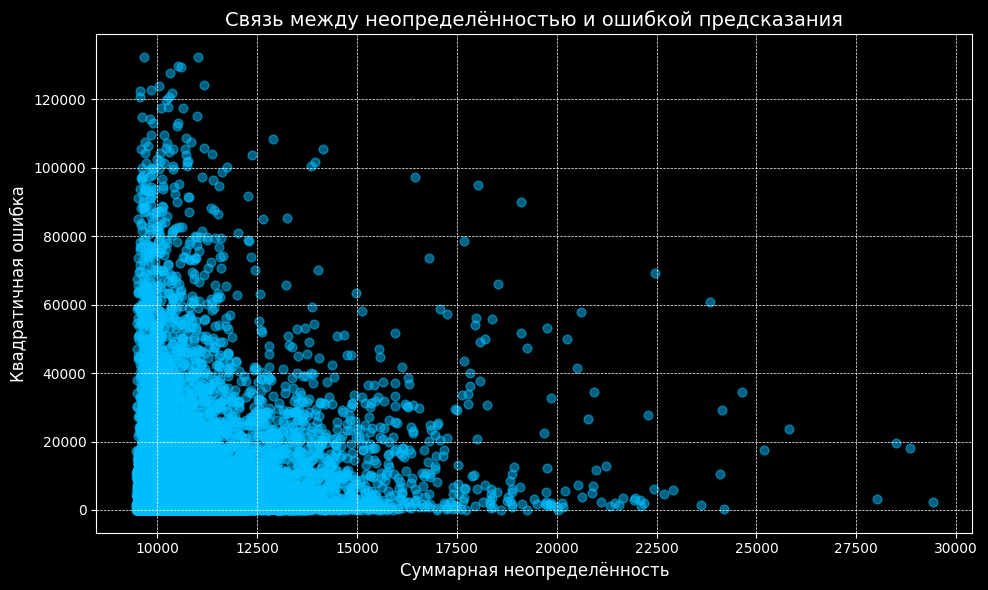

Stacking MSE:  9467.1547
Stacking RMSE: 97.2993
Mean Epistemic Uncertainty:  1414.5002
Mean Aleatoric Uncertainty:  9467.1547
Mean Total Uncertainty:      10881.6550


In [ ]:
plt.style.use("dark_background")
plt.figure(figsize=(10, 6))
plt.scatter(total_uncertainty, squared_error, alpha=0.5, s=40, color='deepskyblue')
plt.xlabel("Суммарная неопределённость", fontsize=12)
plt.ylabel("Квадратичная ошибка", fontsize=12)
plt.title("Связь между неопределённостью и ошибкой предсказания", fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)

print(f"Stacking MSE:  {mse:.4f}")
print(f"Stacking RMSE: {rmse:.4f}")
print(f"Mean Epistemic Uncertainty:  {epistemic_uncertainty.mean():.4f}")
print(f"Mean Aleatoric Uncertainty:  {aleatoric_uncertainty.mean():.4f}")
print(f"Mean Total Uncertainty:  {total_uncertainty.mean():.4f}")


### mean aleatoric = stacking mse, что хорошо. Epistemic показывает 1414, основной источник ошибки — не в незнании модели, а в шуме или нестабильности самих данных скорее всего. Total Uncertainty это сумма Aleatoric и Epistemic, большую часть составляет Aleortic.

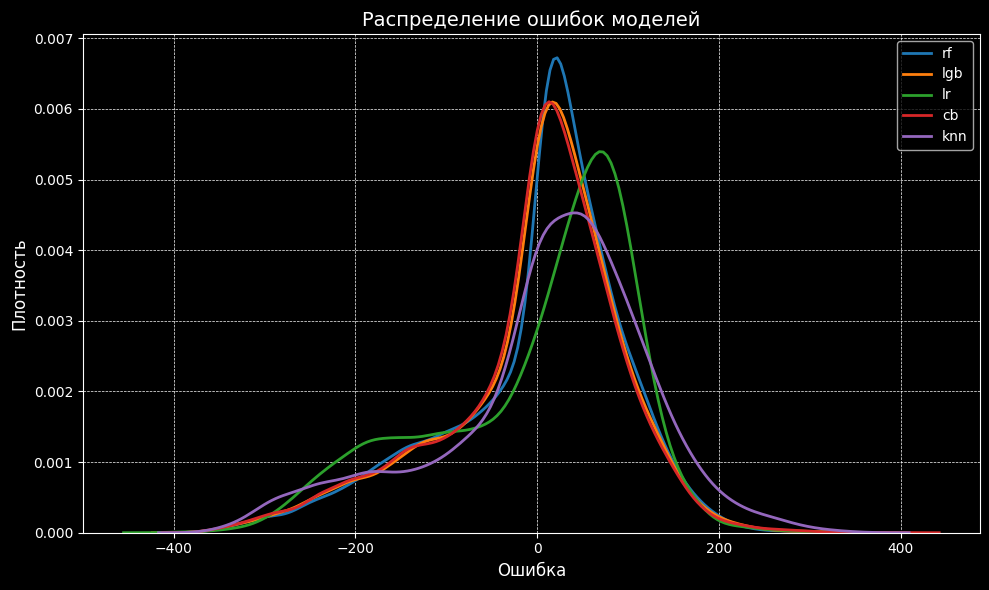

In [ ]:
custom_colors = {
    "rf": "#1f77b4",
    "lgb": "#ff7f0e",
    "lr": "#2ca02c",
    "cb": "#d62728",
    "knn": "#9467bd"
}

plt.style.use("dark_background")
plt.figure(figsize=(10, 6))

for name in model_names:
    sns.kdeplot(errors_df[name], label=name, linewidth=2, color=custom_colors.get(name, None))

plt.xlabel("Ошибка", fontsize=12)
plt.ylabel("Плотность", fontsize=12)
plt.title("Распределение ошибок моделей", fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

### В данном случае хорошо видно, что модели lgb и cb схожи, а остальные модели сильно отличаются, что хорошо для стэкинга. Если бы распределения ошибок были одинаковыми, то наша метамодель не смогла бы извлечь ничего нового.

### Тут я решила посмотреть на ошибку каждой модели и итоговой на тестовых данных

<ipython-input-172-8ed67613fa94>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=mse_values, palette="magma")


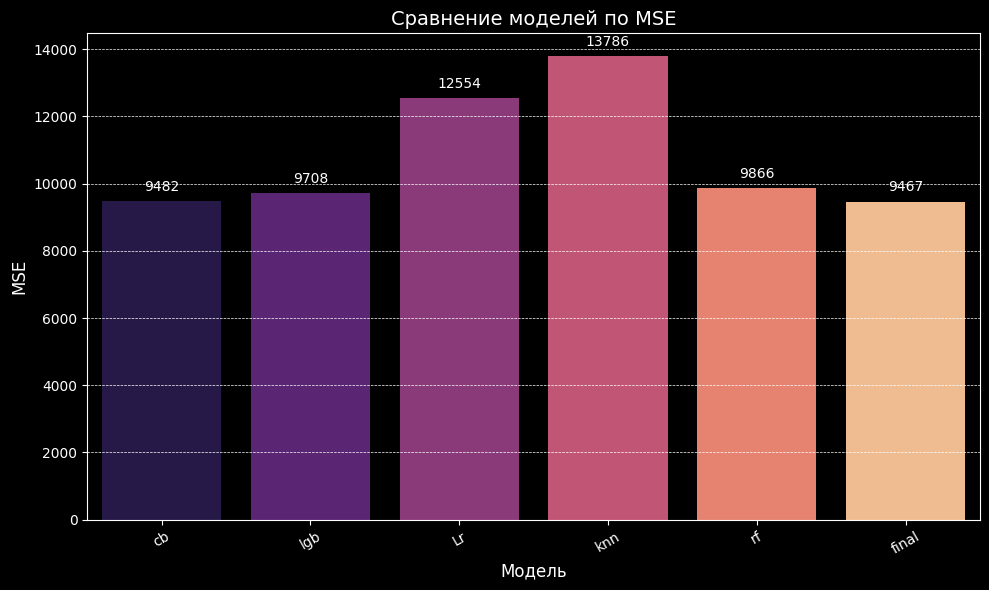

In [ ]:
model_names = list(model_pred.keys())
mse_values = list(model_pred.values())

plt.style.use("dark_background")
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=mse_values, palette="magma")

plt.ylabel("MSE", fontsize=12)
plt.xlabel("Модель", fontsize=12)
plt.title("Сравнение моделей по MSE", fontsize=14)
plt.xticks(rotation=30)

for i, v in enumerate(mse_values):
    plt.text(i, v + 300, f"{v:.0f}", ha='center', fontsize=10, color='white')

plt.tight_layout()
plt.show()

### Видим, что финальная модель по ошибке похожа на кэтбуст, но дает сильно ниже ошибку, чем другие модели

## Вывод: для того чтобы ансамбль был успешен - надо чтоб были разнообразные по природе модели, не скоррелированные между собой и с разными bias/variance => итоговая модель учтет все сильные стороны предыдущих, что позволит снизить ошибку.
## При построении я смотрела на матрицу корреляции. Первый раз я выбрала схожие модели - xgboost, catboost, lgb, rf, hgb - у всех была корреляция от 0.95 и до 1, ошибка финальной модели - 11000. Так же была проблема при построении ансамбля - ошибка на кросс валидации и ошибка на тесте были сильно разными(3500 и 10000).Параметры я подбирала с помощью оптуны.
##Потом я поняла, что модели должны быть разными(вроде бы очевидно, но нет) и ошибка снизилась до 9467. Я добавила linear regression и knn, они показали слабую корреляцию и значительно понизили ошибку+ ошибка на кросс валидации и на тесте стала одинаковой, что говорит о правильности построения финальной модели